In [1]:
%load_ext autoreload
%autoreload 2

import os
from os.path import join
import numpy as np
import Pk_library as PKL
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('./style.mcstyle')

import h5py

In [12]:
from cmass.utils import load_params
lhid = 4
# wdir = '/home/mattho/git/ltu-cmass/data/'
wdir = '/anvil/scratch/x-mho1/cmass-ili/'
cosmo = load_params(lhid, '../params/latin_hypercube_params.txt')

In [30]:
# Load 1gpc/h simulation

cdir = wdir+f'quijotelike/fastpm/L1000-N128/{lhid}'
with h5py.File(join(cdir, 'nbody.h5'), 'r') as f:
    a = list(f.keys())[-1]
    r1 = f[a]['rho'][...]
with h5py.File(join(cdir, 'transfer.h5'), 'r') as f:
    ric1 = f['rho'][...]

In [31]:
# Load 2gpc/h simulation

cdir = wdir+f'abacuslike/fastpm/L2000-N256/{lhid}'
with h5py.File(join(cdir, 'nbody.h5'), 'r') as f:
    a = list(f.keys())[-1]
    r2 = f[a]['rho'][...]
with h5py.File(join(cdir, 'transfer.h5'), 'r') as f:
    ric2 = f['rho'][...]

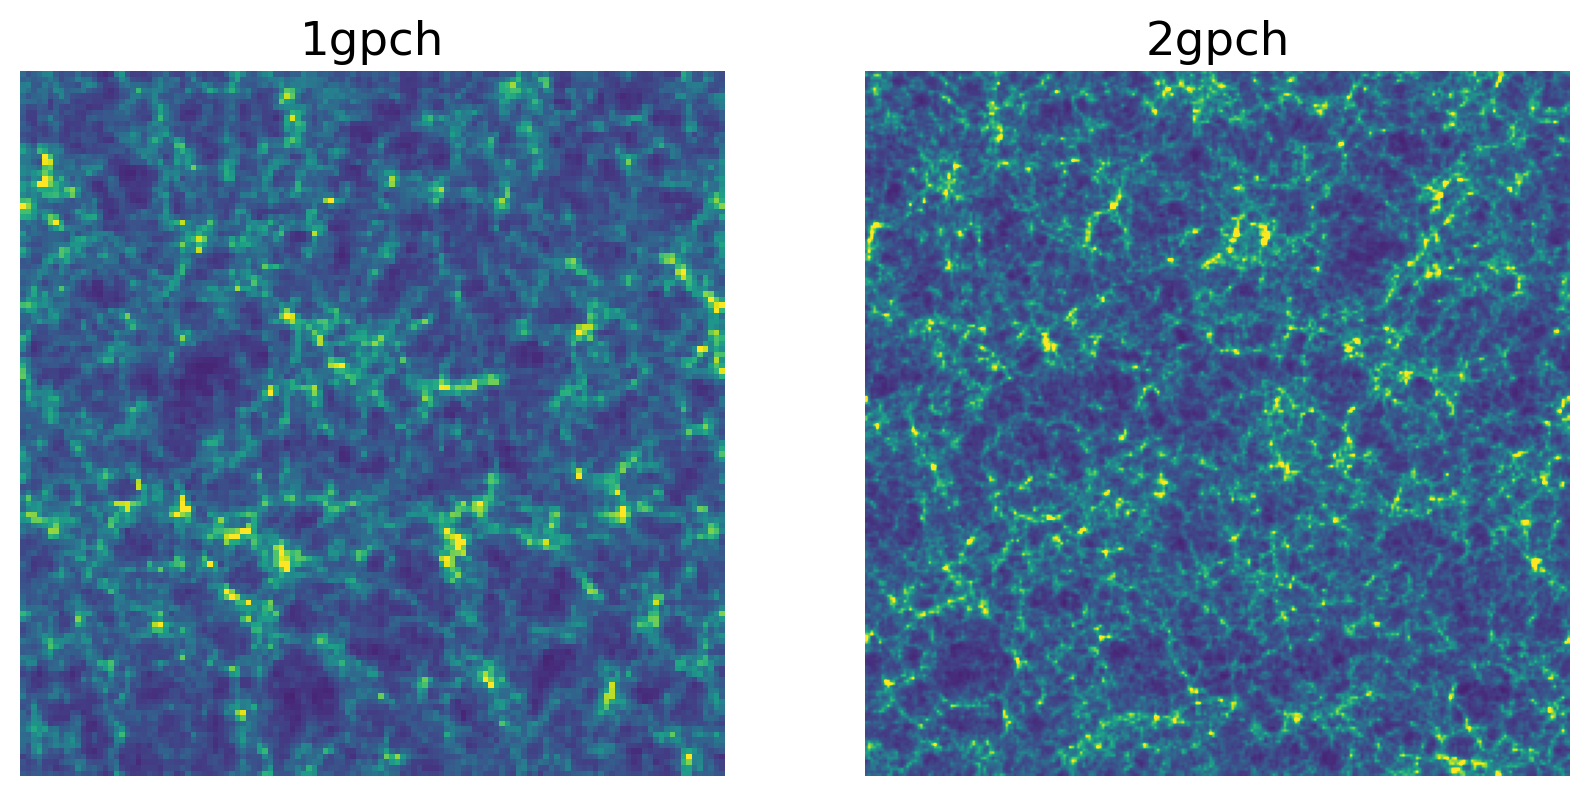

In [32]:
f, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].imshow(np.mean(r1[50:60], axis=0), vmin=-1, vmax=2)
axs[0].set_title('1gpch')
axs[1].imshow(np.mean(r2[50:60], axis=0), vmin=-1, vmax=2)
axs[1].set_title('2gpch')
for ax in axs:
    ax.axis('off')

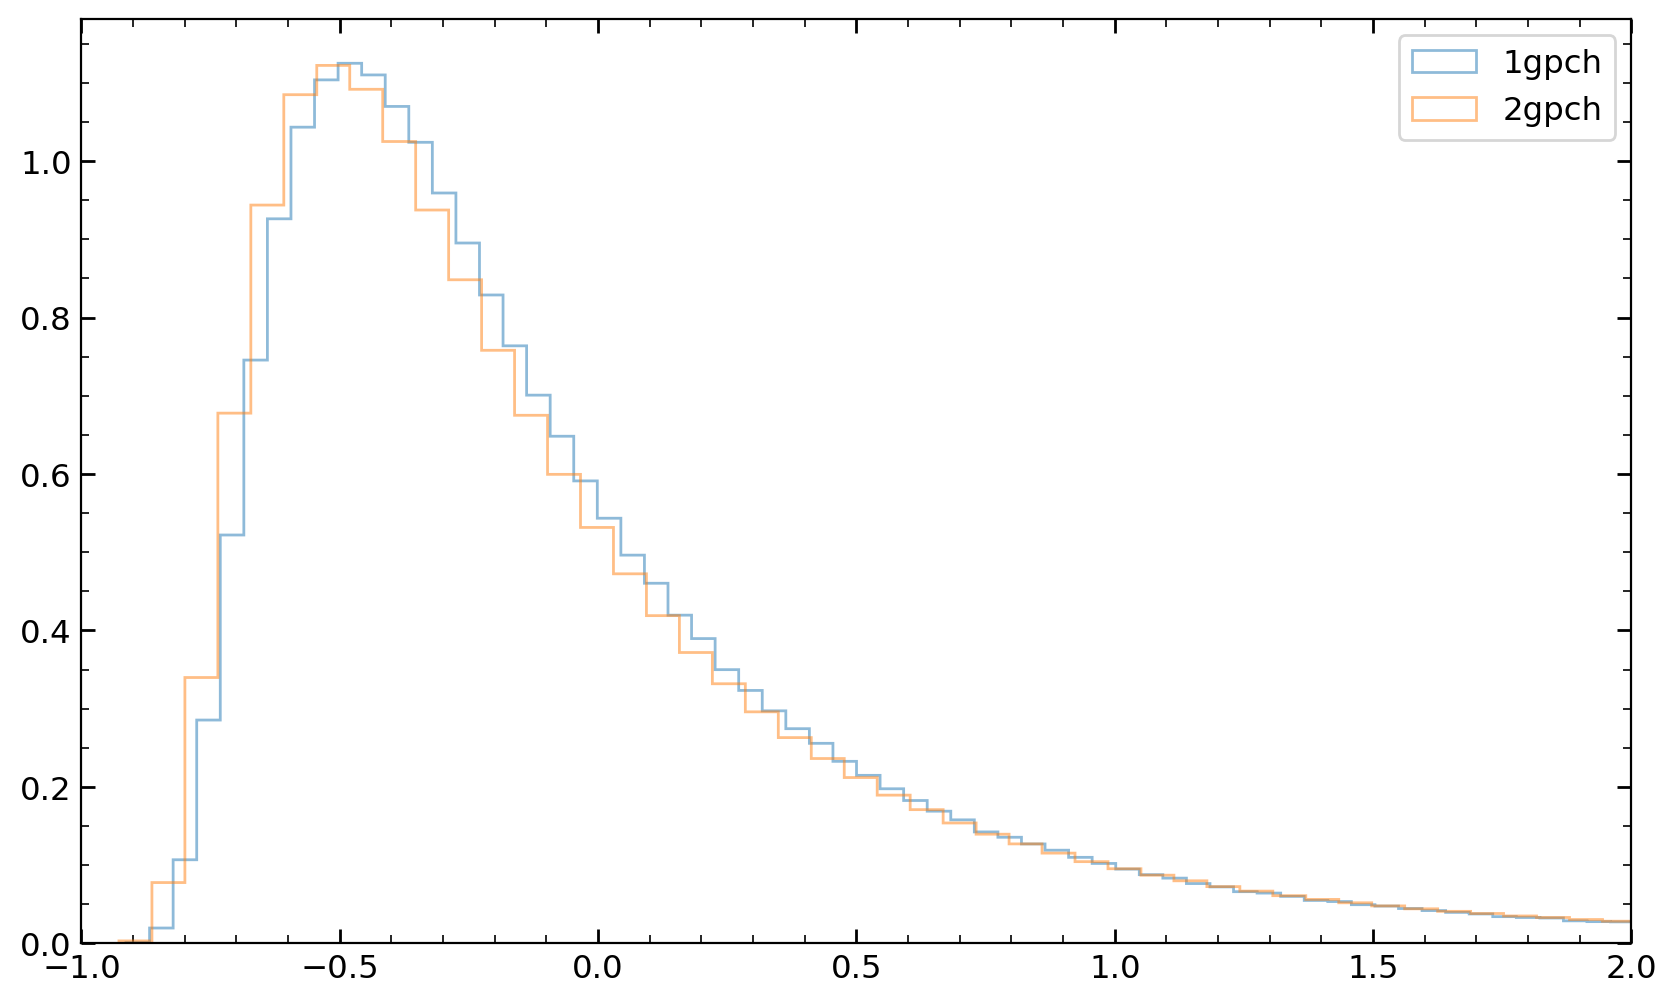

In [29]:
plt.hist(r1.flatten(), bins=1000, alpha=0.5, label='1gpch', density=True, histtype='step')
plt.hist(r2.flatten(), bins=1000, alpha=0.5, label='2gpch', density=True, histtype='step')
plt.xlim(-1, 2)
plt.legend()